# Get MF-DFA on starling amplitude envelope
#### Date: 8/31/2022, JX
> Use MF-DFA on /mnt/cube/j8xing/starling_rhythm_mfdfa/data/starling_zenodo_2019_amp_envs.pickle

In [1]:
from starling_rhythm.utils.paths import PROCESSED_DIR, PROJECT_DIR

## Import dataframe

In [2]:
import pandas as pd

In [3]:
SAVE_PATH = PROCESSED_DIR / 'starling_b1555_amp_envs200.pickle'
ae_df = pd.read_pickle(SAVE_PATH)

In [4]:
ae_df.head()

,start_ms,end_ms,start_sample,end_sample,p_step,rms_p,peak_p,bout_check,file,len_ms,...,peaks_p,n_peaks,l_p_ratio,waveform,valid_waveform,valid,spectrogram,confusing,is_call,amp_env
0,508500,566065,24408000,27171120,"[28.88509981238539, 65.14898407709249, 103.180...",9.609107,143.211264,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,57565,...,"[5, 292, 515, 688, 872, 1142, 1152, 1172, 1180...",472,121.959746,"[-5, -5, -5, -5, -3, -5, -5, -4, -6, -4, -2, -...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",False,False,"[2.4892911824281327e-05, 0.002640440361574292,..."
1,641180,694125,30776640,33318000,"[48.20694858466058, 83.76981436987464, 108.852...",5.388905,156.745806,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,52945,...,"[5, 254, 590, 597, 784, 936, 1167, 1638, 1648,...",555,95.396396,"[3, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, -1, -1, -...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",False,False,"[5.805372893519234e-06, 0.0016227918677031994,..."
2,868940,921030,41709120,44209440,"[2.3001409701376363, 15.027985352733767, 30.17...",8.135380,156.958417,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,52090,...,"[6, 16, 520, 532, 542, 568, 596, 1162, 1180, 1...",400,130.225000,"[-11, -11, -11, -11, -12, -11, -11, -11, -10, ...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",False,False,"[9.765496361069381e-05, 0.007925855927169323, ..."
3,1043035,1093720,50065680,52498560,"[2.9249842953419494, 3.1541257656248125, 14.16...",8.135380,144.054406,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,50685,...,"[6, 13, 20, 611, 620, 632, 641, 648, 1233, 124...",276,183.641304,"[-2, -2, -1, -2, -2, -2, -3, -3, -3, -3, -3, -...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",False,False,"[5.769828931079246e-05, 0.015915358439087868, ..."
4,1423905,1474480,68347440,70775040,"[3.937345912388517, 3.469701876813218, 2.86553...",4.015413,140.816750,True,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,50575,...,"[7, 14, 28, 37, 46, 58, 68, 80, 92, 102, 109, ...",641,78.900156,"[6, 5, 5, 5, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, ...",True,True,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",False,False,"[5.337237780622672e-06, 0.0012986172223463655,..."


## make sliding windows

In [5]:
import numpy as np

In [6]:
window_size = 10000 #ms

In [7]:
total_ae_windows = []
total_wf_windows = []
total_ae_segs = []
total_wf_segs = []

for amp_env, waveform in zip(ae_df['amp_env'].values, ae_df['waveform'].values):
    ae_windows = np.arange(0, len(amp_env), step = 200)
    wf_windows = np.arange(0, len(waveform), step = 48000)
    
    total_ae_windows.append(ae_windows)
    total_wf_windows.append(wf_windows)
    
    ## make segments
    ae_segs = []
    wf_segs = []
    
    for step in ae_windows:
        ae_segs.append(amp_env[step:step+2000])
        wf_segs.append(waveform[step:step+10*48000])
        
    total_ae_segs.append(ae_segs)
    total_wf_segs.append(wf_segs)

In [8]:
segs_df = pd.DataFrame(
    {
        'file': ae_df['file'].values,
        'ae_windows': total_ae_windows,
        'wf_windows': total_wf_windows,
        'ae_segs': total_ae_segs,
        'wf_segs': total_wf_segs
    }
)

In [9]:
segs_df

,file,ae_windows,wf_windows,ae_segs,wf_segs
0,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,"[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600...","[0, 48000, 96000, 144000, 192000, 240000, 2880...","[[2.4892911824281327e-05, 0.002640440361574292...","[[-5, -5, -5, -5, -3, -5, -5, -4, -6, -4, -2, ..."
1,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,"[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600...","[0, 48000, 96000, 144000, 192000, 240000, 2880...","[[5.805372893519234e-06, 0.0016227918677031994...","[[3, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, -1, -1, ..."
2,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,"[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600...","[0, 48000, 96000, 144000, 192000, 240000, 2880...","[[9.765496361069381e-05, 0.007925855927169323,...","[[-11, -11, -11, -11, -12, -11, -11, -11, -10,..."
3,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,"[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600...","[0, 48000, 96000, 144000, 192000, 240000, 2880...","[[5.769828931079246e-05, 0.015915358439087868,...","[[-2, -2, -1, -2, -2, -2, -3, -3, -3, -3, -3, ..."
4,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,"[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600...","[0, 48000, 96000, 144000, 192000, 240000, 2880...","[[5.337237780622672e-06, 0.0012986172223463655...","[[6, 5, 5, 5, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3,..."
...,...,...,...,...,...
1036,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,"[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600...","[0, 48000, 96000, 144000, 192000, 240000, 2880...","[[3.023368481080979e-05, 0.0012741615064442158...","[[-6, -8, -9, -6, -4, -5, -8, -10, -8, -6, -6,..."
1037,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,"[0, 200, 400, 600, 800, 1000, 1200, 1400]","[0, 48000, 96000, 144000, 192000, 240000, 2880...","[[7.692791405133903e-05, 0.018301259726285934,...","[[12, 13, 12, 12, 12, 12, 14, 14, 14, 13, 12, ..."
1038,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,"[0, 200, 400, 600, 800, 1000, 1200]","[0, 48000, 96000, 144000, 192000, 240000, 288000]","[[1.1144771633553319e-05, 0.002191337989643216...","[[12, 9, 5, 4, 4, 6, 10, 10, 11, 13, 16, 16, 1..."
1039,/mnt/sphere/speech_bci/raw_data/s_b1555_22/202...,"[0, 200, 400, 600, 800, 1000]","[0, 48000, 96000, 144000, 192000, 240000]","[[7.4280251283198595e-06, 0.02198933996260166,...","[[-4, -5, -6, -6, -5, -2, -3, -5, -6, -9, -9, ..."


## only look at 50 entries

In [10]:
iterations = 50

In [11]:
segs_df = segs_df[:iterations]

In [12]:
len(segs_df)

50

In [13]:
import matplotlib.pyplot as plt

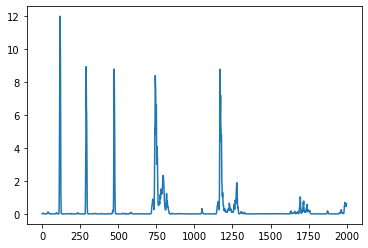

In [14]:
plt.plot(segs_df.ae_segs.values[0][3])

## Pull out MF-DFA

> 1. Filter time-series to have compact support
2. Determine time windows

In [15]:
import numpy as np
from starling_rhythm.mfdfa import hurst_expo
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm

/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
n_jobs = 36 ## set up joblib parameters
verbose = 0

In [17]:
segs_df.ae_segs.values[0]

[array([2.48929118e-05, 2.64044036e-03, 4.81498102e-03, ...,
        2.77728919e-04, 2.24924923e-04, 1.25713181e-04]),
 array([0.25943863, 1.15602851, 3.28730297, ..., 0.01120721, 0.00621114,
        0.00334101]),
 array([0.00167847, 0.00125574, 0.00108813, ..., 0.00060194, 0.00064167,
        0.00068789]),
 array([0.0067864 , 0.01105886, 0.02339072, ..., 0.55593443, 0.58825535,
        0.61708117]),
 array([0.00079527, 0.00066831, 0.00048928, ..., 0.36379382, 0.27252826,
        0.36040649]),
 array([0.00128242, 0.00121448, 0.00073722, ..., 0.10253375, 0.09407265,
        0.07590251]),
 array([0.00070443, 0.00069629, 0.0007025 , ..., 0.02735162, 0.02935601,
        0.05063018]),
 array([1.61708915, 1.31213534, 1.0081408 , ..., 0.02310122, 0.03931994,
        0.05223382]),
 array([2.49445031e-04, 2.46736367e-04, 2.44106675e-04, ...,
        6.17588580e-01, 5.55154204e-01, 4.81342375e-01]),
 array([0.28058562, 0.16150443, 0.1865323 , ..., 0.3849726 , 0.37887383,
        0.42770371]),
 a

In [18]:
total_MF_range = []
total_h_expos = []

for ae_seg in segs_df.ae_segs.values[:iterations]:
    with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
        h_expos = parallel(
            delayed(hurst_expo)(
                amp_env
            ) 
            for amp_env in tqdm(ae_seg, desc = "Retrieving Hurst Exponents for all Amplitude Envelopes.")
        )
        
    ## Get MF_range
    MF_range = []
    for h_expo in h_expos:
        MF_range.append(max(h_expo) - min(h_expo))
        
    total_MF_range.append(MF_range)
    total_h_expos.append(h_expos)
    
segs_df['MF_range'] = total_MF_range
segs_df['h_expos'] = total_h_expos

Retrieving Hurst Exponents for all Amplitude Envelopes.: 100%|██████████| 60/60 [00:22<00:00,  2.62it/s]
Retrieving Hurst Exponents for all Amplitude Envelopes.: 100%|██████████| 55/55 [00:00<00:00, 6393.93it/s]
Retrieving Hurst Exponents for all Amplitude Envelopes.: 100%|██████████| 55/55 [00:00<00:00, 5304.24it/s]
Retrieving Hurst Exponents for all Amplitude Envelopes.: 100%|██████████| 53/53 [00:00<00:00, 5850.87it/s]
Retrieving Hurst Exponents for all Amplitude Envelopes.: 100%|██████████| 53/53 [00:00<00:00, 10731.78it/s]
Retrieving Hurst Exponents for all Amplitude Envelopes.: 100%|██████████| 53/53 [00:00<00:00, 5109.60it/s]
Retrieving Hurst Exponents for all Amplitude Envelopes.: 100%|██████████| 53/53 [00:00<00:00, 10196.23it/s]
Retrieving Hurst Exponents for all Amplitude Envelopes.: 100%|██████████| 53/53 [00:00<00:00, 7030.08it/s]
Retrieving Hurst Exponents for all Amplitude Envelopes.: 100%|██████████| 52/52 [00:00<00:00, 13622.12it/s]
Retrieving Hurst Exponents for all A

## Pickle dataframe

In [19]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir

In [20]:
SAVE_PATH = PROCESSED_DIR / 'starling_b1555_rolling.pickle'
ensure_dir(SAVE_PATH)

In [21]:
segs_df.to_pickle(SAVE_PATH)

In [22]:
segs_df.head()

NameError: name 'seg_df' is not defined